<a href="https://colab.research.google.com/github/Arash-Razi/ML_Dr_Aliyari_Course_2025/blob/main/MiniP0/ML2025_MiniP0_CWRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3.1 (Importing Dataset)
---

Importing Data and Storing It in a variable called "Dataset"

In [ ]:
import scipy.io as ioo

path = r"E:\2nd Semecter\Machine Learning\HW\0\Code\Dataset\110.mat"

dataset = ioo.loadmat(path)

Checking Dataset's Type

In [ ]:
print(type(dataset))

<class 'dict'>


Showing Dataset's Content

In [ ]:
print(dataset.keys())

for i in range (5):
    print(f'X110_DE_time-{i}: {dataset["X110_DE_time"][i]}   X110_FE_time-{i}: {dataset["X110_FE_time"][i]}')

dict_keys(['__header__', '__version__', '__globals__', 'X110_DE_time', 'X110_FE_time', 'X110RPM'])
X110_DE_time-0: [0.03212677]   X110_FE_time-0: [0.08629091]
X110_DE_time-1: [0.07823077]   X110_FE_time-1: [0.11053455]
X110_DE_time-2: [0.16146831]   X110_FE_time-2: [0.11012364]
X110_DE_time-3: [0.25054708]   X110_FE_time-3: [0.08012727]
X110_DE_time-4: [0.31542646]   X110_FE_time-4: [0.00472545]


Selecting one signal from 2 main measured Signals (X110_FE_time & X110_DE_time) and store it in a variable called "data"

In [ ]:
data = dataset["X110_DE_time"]

3.2 (Visualizing Signal)
--


Plotting Signal in the whole duration

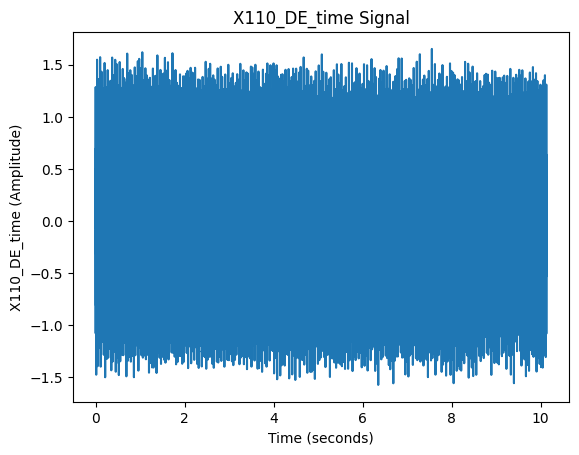

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fs = 48000
N = len(data) # N is samples count
T = N/fs # T is the duration of the signal

t = np.linspace(0,T,N,endpoint=False)
plt.plot(t, data)

plt.xlabel("Time (seconds)")
plt.ylabel('X110_DE_time (Amplitude)')
plt.title("X110_DE_time Signal")
plt.show()


Plotting Signal in [2 - 2.01] duration

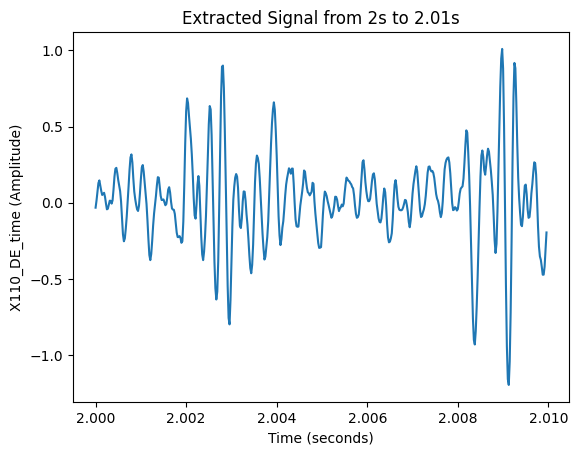

In [ ]:
t_start, t_end = 2, 2.01


start_idx = int(t_start * fs)
end_idx = int(t_end * fs)


t_segment = t[start_idx:end_idx]
data_segment = data[start_idx:end_idx]


plt.plot(t_segment, data_segment)
plt.xlabel("Time (seconds)")
plt.ylabel("X110_DE_time (Amplitude)")
plt.title("Extracted Signal from 2s to 2.01s")
plt.show()

3.3 (Frequency Domain Analysis)
---

Showing Signals FFT

Defining a function which plots dft and also calculates Dominant frequency:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_frequency_spectrum(signal, fs,title:str):
    signal = signal.flatten()

    N = len(signal)
    freq = np.fft.fftfreq(N, d=1/fs)
    spectrum = np.fft.fft(signal)


    half_N = N // 2
    freq = freq[:half_N]
    spectrum = np.abs(spectrum[:half_N])
    dominant_frequency = freq[np.argmax(spectrum)]


    plt.figure()
    plt.plot(freq, spectrum)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.title("Frequency Spectrum of Signal")
    plt.grid()
    plt.show()
    print(f'Dominant Frequency: {dominant_frequency}')



Plotting Frequency Spectrum Of Signal & calculating Dominant Frequency


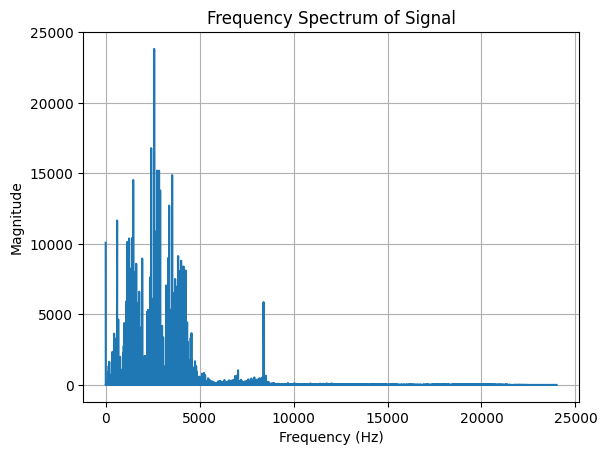

Dominant Frequency: 2580.242851031623


In [ ]:
plot_frequency_spectrum(signal=data,fs=48000,title='X110_DE_time')

3.4 (Signal Segmentation)
---

Dividing Signal into 128 Segments and saving them in an numpy array
To do this the followign steps are done:

    *first a function is defined to do the segmentation, this function takes 3 arguments
        *first argument is the signal itself
        *second argument is each segment's length
        *third argument is the overlap count(for example if each segment count is 128 and 20% overlap is needed this argument should be set to int(128*0.2) )
    *then after defining the function, it should be called.



In [ ]:
def segment_signal(signal, segment_length=128, overlap=0):
    signal = signal.flatten()
    step = segment_length - overlap
    num_segments = (len(signal) - overlap) // step

    segments = np.array([signal[i:i + segment_length] for i in range(0, len(signal) - segment_length + 1, step)])

    return segments


In [ ]:
#calling previous Function
segmented_signal = segment_signal(signal=data,segment_length=128,overlap=int(0.2*128))
print(f'segmented_signal: {segmented_signal.shape}')

segmented_signal: (4720, 128)


Storing Segmented Signal in DataFrame

In [ ]:
import pandas as pd

df = pd.DataFrame(segmented_signal)


plotting 10 segments that are multiples of 13 on the same graph,PotUsing the created DataFrame.

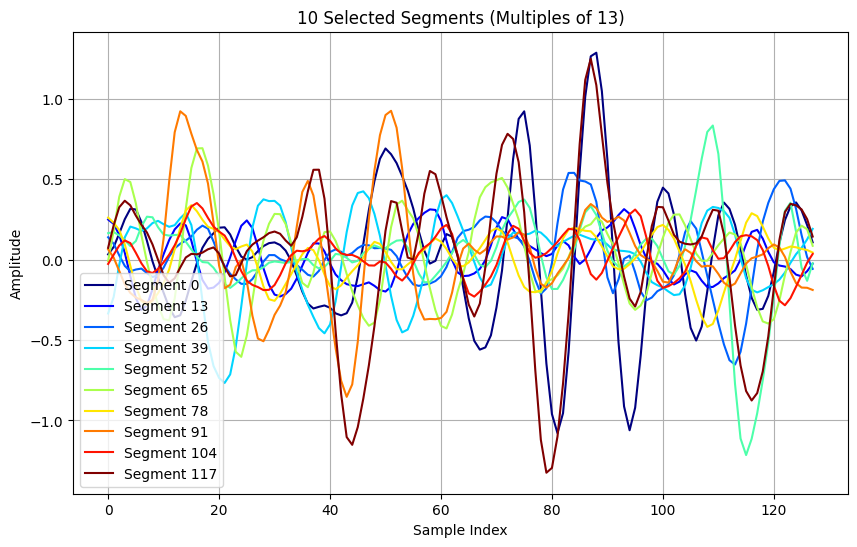

In [ ]:
plt.figure(figsize=(10, 6))
colors = plt.cm.jet(np.linspace(0, 1, 10))


for i, idx in enumerate(range(0, len(df), 13)[:10]):
    plt.plot(df.columns, df.iloc[idx], label=f"Segment {idx}", color=colors[i])


plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.title("10 Selected Segments (Multiples of 13)")
plt.legend()
plt.grid(True)
plt.show()

3.5 (Feature Extraction)
---

1. defining a function that takes the signal as the input and calculates Mean, STD, and root square error


In [ ]:
def signal_statistics(signal):

    signal = signal.flatten()

    mean_value = np.mean(signal)
    std_dev = np.std(signal)
    rms_value = np.sqrt(np.mean(signal ** 2))

    return mean_value, std_dev, rms_value


# Calling the function for X110_DE_time
print(signal_statistics(data))

(0.020730911431768074, 0.27791902216826464, 0.2786911436909257)


2. Using the created function for all previous samples and storing them in a Dataframe

In [ ]:
stats = [signal_statistics(row) for row in df.values]

stats_df = pd.DataFrame(stats, columns=["Mean", "Standard Deviation", "RMS"])
print(stats_df.head())

       Mean  Standard Deviation       RMS
0  0.023212            0.435161  0.435780
1  0.015631            0.199025  0.199638
2  0.030200            0.140886  0.144087
3  0.015240            0.284494  0.284902
4  0.004845            0.163869  0.163941


3. Storing Dataframe in a seprate CSV file

In [ ]:

stats_df.to_csv("signal_statistics.csv", index=False)